# Visualization of K-Means applied on raw pixels

In [114]:
import cv2 as cv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [115]:
from src.hierarchical_properties.k_means import k_means_img_patch
from src.data_generation.utils import downsample_img

In [116]:
# Constants
img_path = r"../../data/img_trial/abc.png"

full_size = 448
patch_size = 14

# K-Means
k_s = [2, 4, 6, 8]
max_iter = 100
epsilon = 0.2
attempts = 10
normalize = True
bilinear_interpolation_flag = cv.INTER_LINEAR
nn_interpolation_flag = cv.INTER_NEAREST

weight_original_img = 0.4
weight_colored_patch = 0.4
gamma = 0

In [117]:
img = cv.imread(img_path)
img = downsample_img(img, full_size, full_size, False)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [118]:
final_images_bilinear_interp = []
final_images_nn_interp = []

for k in k_s:
    final_img_bilinear_interp, final_img_nn_interp = \
        k_means_img_patch(img, patch_size, k, max_iter, epsilon,
                          attempts, normalize,
                          weight_original_img=0.4,
                          weight_colored_patch=0.4, gamma=0,
                          compute_also_nn_interpolation=True)
    final_images_bilinear_interp.append(final_img_bilinear_interp)
    final_images_nn_interp.append(final_img_nn_interp)


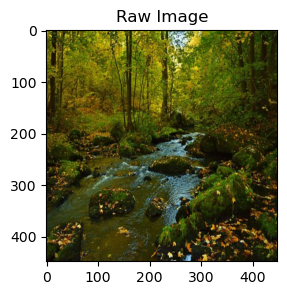

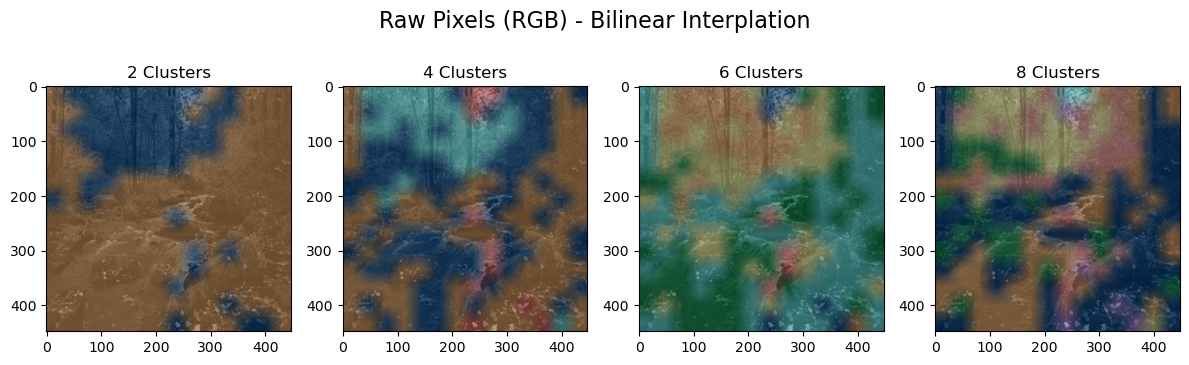

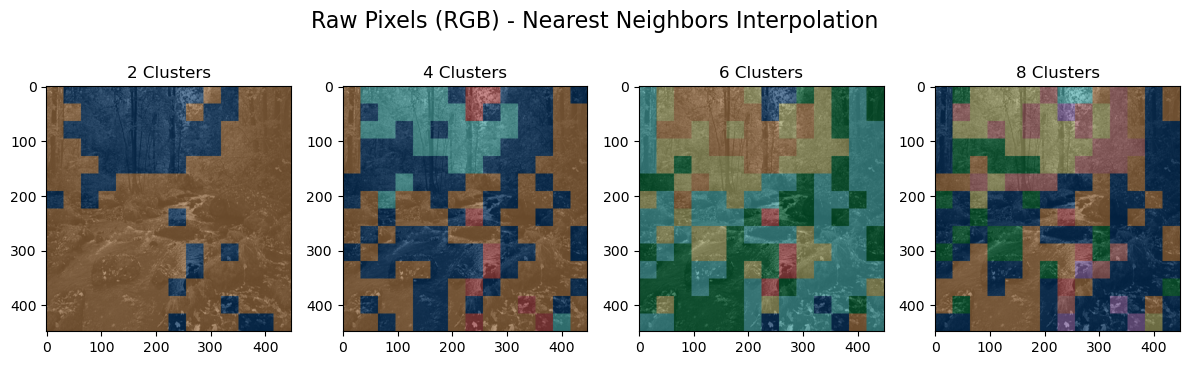

In [119]:
# Plots

# Raw Image
fig = plt.figure(figsize=(3, 3))
plt.title("Raw Image")
plt.imshow(img)
plt.show()

# Raw Pixels (RGB) - Bilinear Interplation
fig, axs = plt.subplots(nrows=1, ncols=len(k_s), figsize=(12, 12))
axs = axs.flatten()
i = 0
for img_kmeans, ax in zip(final_images_bilinear_interp, axs):
    ax.title.set_text(f"{k_s[i]} Clusters")
    ax.imshow(img_kmeans)
    i += 1
fig.suptitle("Raw Pixels (RGB) - Bilinear Interplation", y=0.65, fontsize=16)
fig.tight_layout()
plt.show()

# Raw Pixels (RGB) - Nearest Neighbors Interpolation
fig, axs = plt.subplots(nrows=1, ncols=len(k_s), figsize=(12, 12))
axs = axs.flatten()
i = 0
for img_kmeans, ax in zip(final_images_nn_interp, axs):
    ax.title.set_text(f"{k_s[i]} Clusters")
    ax.imshow(img_kmeans)
    i += 1
fig.suptitle("Raw Pixels (RGB) - Nearest Neighbors Interpolation", y=0.65, fontsize=16)
fig.tight_layout()
plt.show()

# Visualization of K-Means applied on raw pixels (step by step)

In [120]:
import src
from src.data_generation.utils import downsample_img
from src.hierarchical_properties.k_means import k_means_on_img
import importlib

importlib.reload(src.hierarchical_properties.k_means)
from src.hierarchical_properties.k_means import k_means_on_img

## Extraction of the patch from the original image

In [121]:
k = 2

In [122]:
patch = downsample_img(img, patch_size, patch_size, False)

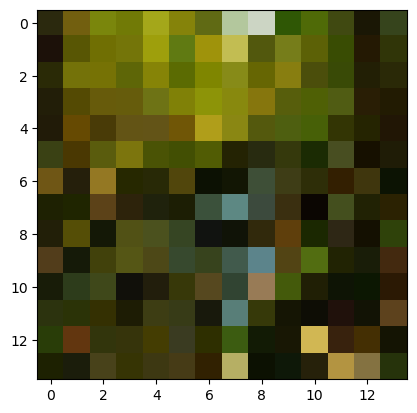

In [123]:
plt.imshow(patch)
plt.show()

### Apply K-Means on the patch

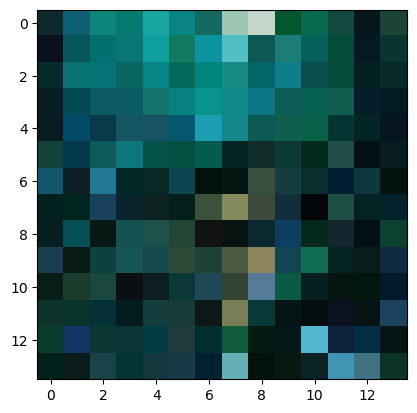

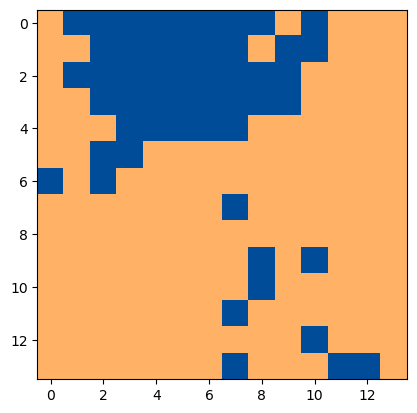

In [124]:
seg_patch = k_means_on_img(patch, k=k, max_iter=max_iter, epsilon=epsilon, attempts=attempts, normalize=normalize, plot=True)

## Bilinear Interpolation

In [125]:
seg_full = downsample_img(seg_patch, full_size, full_size, False, interpolation_method=bilinear_interpolation_flag)

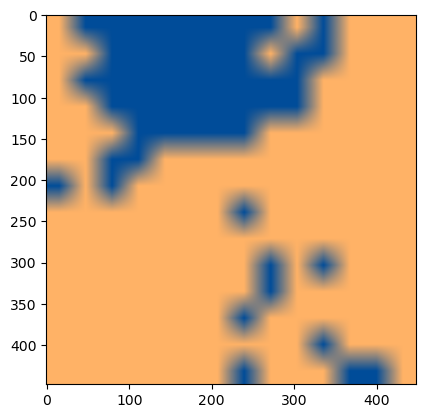

In [126]:
plt.imshow(seg_full)
plt.show()

In [127]:
# Convert the original image as grayscale image to put it in the background
# to be able to put the patch (the output of Kmeans) over it in a transparent
# way.
# Single channel grayscale image
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Repeat the grayscale image along all the 3 channels
stacked_img = np.stack((img_gray, ) * 3, axis=-1)

In [128]:
final_img = cv.addWeighted(stacked_img, weight_original_img, seg_full, weight_colored_patch, gamma)

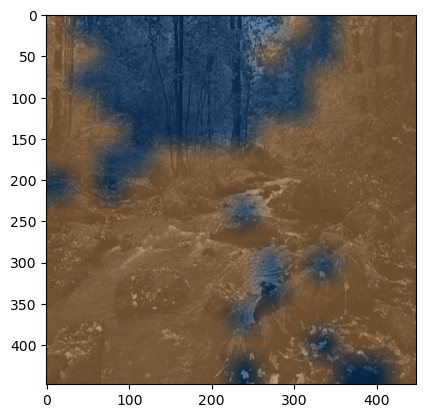

In [129]:
plt.imshow(final_img)
plt.show()

## Nearest Neighbors Interpolation

In [130]:
seg_full_nearest_neighbor_interp = downsample_img(
    seg_patch, full_size, full_size, False,
    interpolation_method=nn_interpolation_flag)

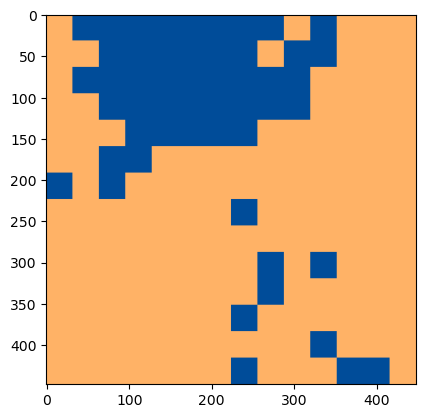

In [131]:
plt.imshow(seg_full_nearest_neighbor_interp)
plt.show()

In [132]:
nearest_neighbor_interp_final_img = cv.addWeighted(
    stacked_img, weight_original_img,
    seg_full_nearest_neighbor_interp,
    weight_colored_patch, gamma)

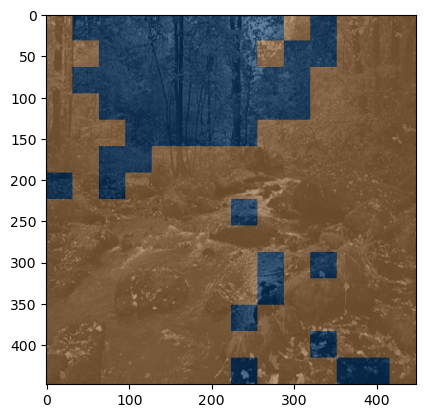

In [133]:
plt.imshow(nearest_neighbor_interp_final_img)
plt.show()